# Euler and Velocity-Verlet Propagation for 2-Body Probelm

This logbook will record the propagation methods of Euler and Veloicty-Verlet integrators, implementing them on the 2-Body gravitational system. It will analyse the methods themselves, their accuracy and their ability to conserve the angular momentum and energies.

In [1]:
# Relevant Imports and Setting up environemnt
# 02/03/2025
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Force function
Defining a function to calculate the force acting on a particular mass due to another using Newton's Universal Law of Gravitation.

In [2]:
def force(r1, r2, m1, m2):
    """
   Using Newton's law of Universal Gravitation, calculating the force on m1 due to m2.
    
    Inputs:
    r1 - position of m1
    r2 - position of m2
    m1 - mass of m1
    m2 - mass of m2
    G - gravitational constant
    
    Output:
    force - force on m1 due to m2 in a vector form
    """
    r12 = r2 - r1
    dist = np.linalg.norm(r12)
    
    if dist == 0:
        F = np.zeros_like(r12) 

    else:
        F = (G * m1 * m2 / dist**3) * r12
    return F

### 2-Body system propagation using Euler method (Large and Small mass)
Propagating a two body system involving a small mass orbiting a large central mass with a mass ratio of 1:1000, using the Euler method.
<br>
An approximation is made where the large mass (m2) is situated at the origin with zero velocity as m2>>m1, causing negligible effect on m2 due to m1's gravitational pull.

In [3]:
# Simulation criteria
Nsteps = 500000
dt = 0.0001
time = np.arange(Nsteps) * dt

# Gravitational constant
G = 1

# Masses 
m1 = 0.0001    
m2 = 1.0      

# Setting up array for positions, velocities
r2 = np.array([0, 0])
v2 = np.array([0, 0])

r1 = np.zeros((Nsteps, 2))
v1 = np.zeros((Nsteps, 2))

# Setting up arrrays for energies and angular momentums
kinetic_energy = np.zeros(Nsteps)
potential_energy = np.zeros(Nsteps)
angular_momentum = np.zeros(Nsteps)

# Initial conditions
r1_i = np.array([1.0, 0.0])
v1_i = np.array([0.0, np.sqrt(G * m2 / np.linalg.norm(r1_i))])

r1[0] = r1_i
v1[0] = v1_i

kinetic_energy[0] = 0.5 * m1 * np.linalg.norm(v1[0]) ** 2
potential_energy[0] = -G * m1 * m2 / np.linalg.norm(r1[0])
angular_momentum[0] = m1 * np.cross(r1[0], v1[0])

# Euler method
for i in range(Nsteps - 1):
    # Calculating the force at t
    f1 = force(r1[i], np.array([0, 0]), m1, m2)
    
    # Calculating new velocity
    v1[i + 1] = v1[i] + (f1 / m1) * dt
    
    # Calculating new position
    r1[i + 1] = r1[i] + v1[i] * dt
    
    # Calculating energies and angular momentum
    kinetic_energy[i + 1] = 0.5 * m1 * np.linalg.norm(v1[i + 1]) ** 2
    potential_energy[i + 1] = -G * m1 * m2 / np.linalg.norm(r1[i + 1])
    angular_momentum[i + 1] = m1 * np.cross(r1[i + 1], v1[i + 1])

# Calculating the  total energy
total_energy = kinetic_energy + potential_energy

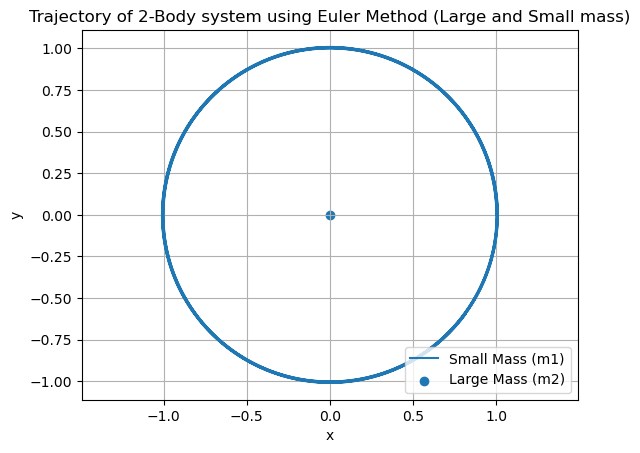

In [4]:
# Plotting the trajectory for the 2-Body system (Large and Small mass)

plt.figure()
plt.plot(r1[:, 0], r1[:, 1], label="Small Mass (m1)")
plt.scatter(0, 0, label="Large Mass (m2)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory of 2-Body system using Euler Method (Large and Small mass)")
plt.legend(loc="lower right")
plt.grid()
plt.axis("equal")
plt.show()

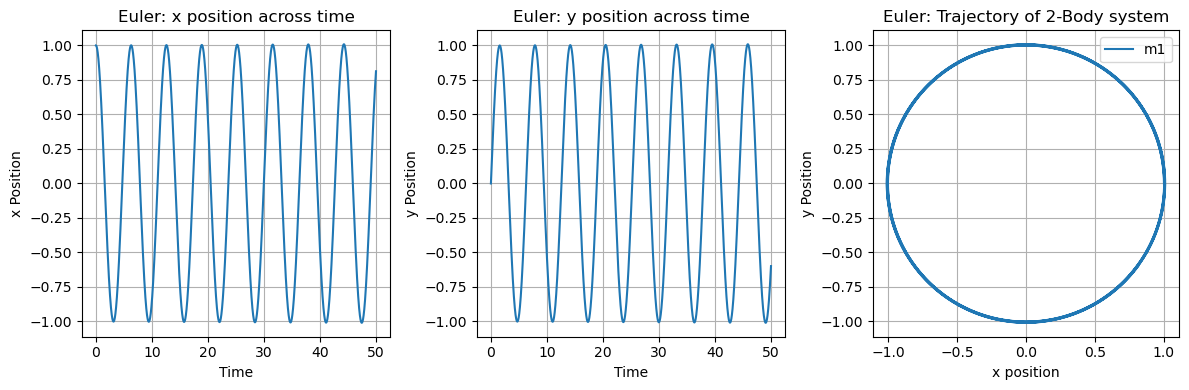

In [5]:
# Plotting the x and y co-ordinates across time

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].plot(time, r1[:, 0], label="x position")
axs[0].set_title("Euler: x position across time")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("x Position")
axs[0].grid()

axs[1].plot(time, r1[:, 1], label="y position")
axs[1].set_title("Euler: y position across time")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("y Position")
axs[1].grid()

#Trajectory plot
axs[2].plot(r1[:, 0], r1[:, 1], label="m1")
axs[2].set_title("Euler: Trajectory of 2-Body system")
axs[2].set_xlabel("x position")
axs[2].set_ylabel("y Position")
axs[2].legend()
axs[2].grid()
axs[2].axis('scaled')

plt.tight_layout()
plt.savefig(fname='Euler')
plt.show()

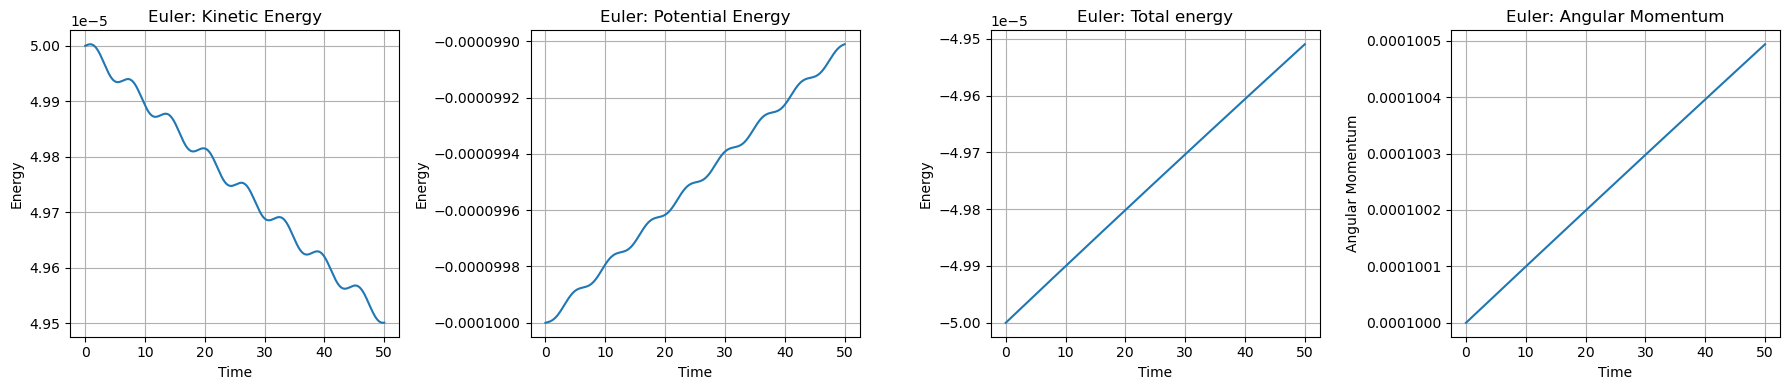

In [6]:
# Plotting the energies and angular momenta
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Kinetic Energies
axs[0].plot(time, kinetic_energy, label="Kinetic Energy")
axs[0].set_title("Euler: Kinetic Energy")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Energy")
axs[0].grid()

# Potential Energies
axs[1].plot(time, potential_energy, label="Potential Energy")
axs[1].set_title("Euler: Potential Energy")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Energy")
axs[1].grid()

# Total angular Momentum of the system
axs[2].plot(time, total_energy, label="Total Energy")
axs[2].set_title("Euler: Total energy")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Energy")
axs[2].grid()

# Total angular Momentum of the system
axs[3].plot(time, angular_momentum, label="Angular Momentum")
axs[3].set_title("Euler: Angular Momentum")
axs[3].set_xlabel("Time")
axs[3].set_ylabel("Angular Momentum")
axs[3].grid()

plt.tight_layout()
plt.savefig(fname='Euler Energy')
plt.show()

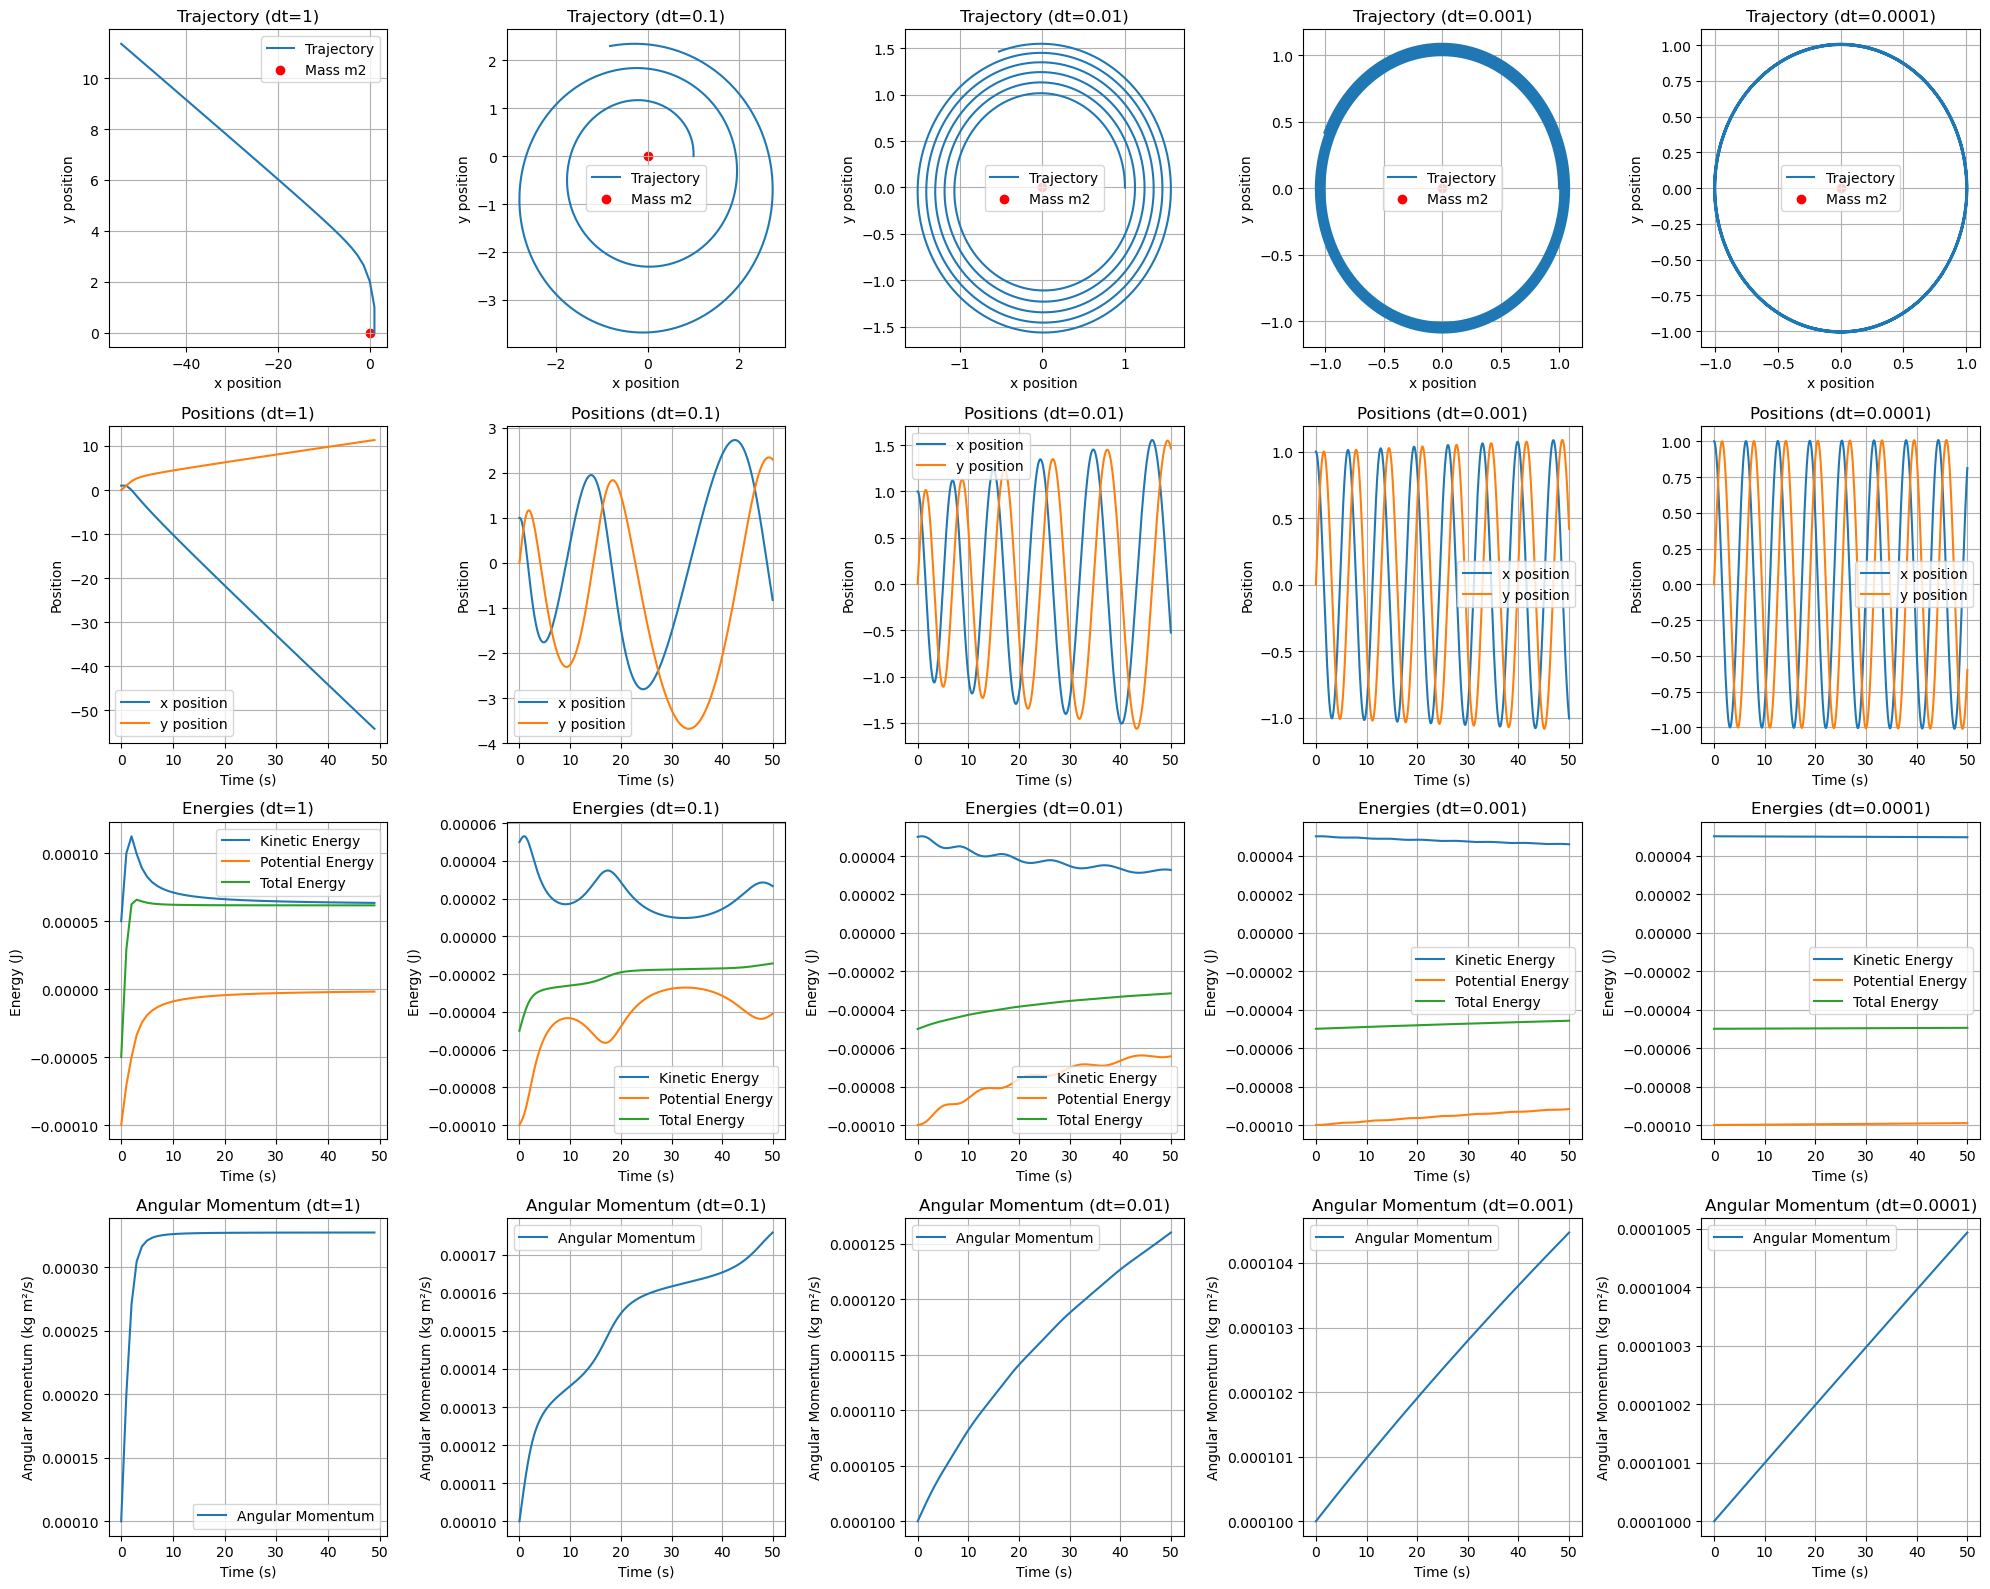

In [7]:
# Time steps to iterate over
dt_values = [1, 0.1, 0.01, 0.001, 0.0001]

fig, axs = plt.subplots(4, len(dt_values), figsize=(20, 16))

std_total_energy_list = []
std_angular_momentum_list = []
std_position_magnitude_list = []

for col, dt in enumerate(dt_values):
    Total_time = 50
    Nsteps = int(Total_time / dt)
    time = np.arange(Nsteps) * dt

    r1 = np.zeros((Nsteps, 2))
    v1 = np.zeros((Nsteps, 2))

    kinetic_energy = np.zeros(Nsteps)
    potential_energy = np.zeros(Nsteps)
    angular_momentum = np.zeros(Nsteps)

    r1[0] = np.array([1.0, 0.0])
    v1[0] = np.array([0.0, np.sqrt(G * m2 / np.linalg.norm(r1[0]))])

    kinetic_energy[0] = 0.5 * m1 * np.linalg.norm(v1[0])**2
    potential_energy[0] = -G * m1 * m2 / np.linalg.norm(r1[0])
    angular_momentum[0] = m1 * np.cross(r1[0], v1[0])

    for i in range(Nsteps - 1):
        f1 = force(r1[i], np.array([0, 0]), m1, m2)
        v1[i + 1] = v1[i] + (f1 / m1) * dt
        r1[i + 1] = r1[i] + v1[i] * dt
        kinetic_energy[i + 1] = 0.5 * m1 * np.linalg.norm(v1[i + 1])**2
        potential_energy[i + 1] = -G * m1 * m2 / np.linalg.norm(r1[i + 1])
        angular_momentum[i + 1] = m1 * np.cross(r1[i + 1], v1[i + 1])
    
    total_energy = kinetic_energy + potential_energy

    # Compute standard deviations
    std_total_energy = np.std(total_energy)
    std_angular_momentum = np.std(np.abs(angular_momentum))
    std_position_magnitude = np.std(np.linalg.norm(r1, axis=1))

    # Append to lists
    std_total_energy_list.append(std_total_energy)
    std_angular_momentum_list.append(std_angular_momentum)
    std_position_magnitude_list.append(std_position_magnitude)


    # Plot 1: Trajectory
    axs[0, col].plot(r1[:, 0], r1[:, 1], label="Trajectory")
    axs[0, col].scatter(0, 0, color='red', label="Mass m2")
    axs[0, col].set_title(f"Trajectory (dt={dt})")
    axs[0, col].set_xlabel("x position")
    axs[0, col].set_ylabel("y position")
    axs[0, col].legend()
    axs[0, col].grid()

    # Plot 2: X and Y positions over time
    axs[1, col].plot(time, r1[:, 0], label="x position")
    axs[1, col].plot(time, r1[:, 1], label="y position")
    axs[1, col].set_title(f"Positions (dt={dt})")
    axs[1, col].set_xlabel("Time (s)")
    axs[1, col].set_ylabel("Position")
    axs[1, col].legend()
    axs[1, col].grid()

    # Plot 3: Total Energies
    axs[2, col].plot(time, kinetic_energy, label="Kinetic Energy")
    axs[2, col].plot(time, potential_energy, label="Potential Energy")
    axs[2, col].plot(time, total_energy, label="Total Energy")
    axs[2, col].set_title(f"Energies (dt={dt})")
    axs[2, col].set_xlabel("Time (s)")
    axs[2, col].set_ylabel("Energy (J)")
    axs[2, col].legend()
    axs[2, col].grid()

    # Plot 4: Total Angular Momentum
    axs[3, col].plot(time, angular_momentum, label="Angular Momentum")
    axs[3, col].set_title(f"Angular Momentum (dt={dt})")
    axs[3, col].set_xlabel("Time (s)")
    axs[3, col].set_ylabel("Angular Momentum (kg m²/s)")
    axs[3, col].legend()
    axs[3, col].grid()

plt.tight_layout()
plt.savefig(fname='Euler Time step')
plt.show()

In [8]:
print(std_total_energy_list)
print(std_angular_momentum_list)
print(std_position_magnitude_list)

[1.626428443616466e-05, 6.2062377095483e-06, 4.9678888564754766e-06, 1.2055428185627592e-06, 1.4151201989389795e-07]
[3.6676099505264955e-05, 1.6813996615361333e-05, 7.221860041729168e-06, 1.288521108794406e-06, 1.425633362671839e-07]
[16.372902971331953, 0.7302984302143343, 0.16563907918698179, 0.026370977849807235, 0.0028699681656426555]


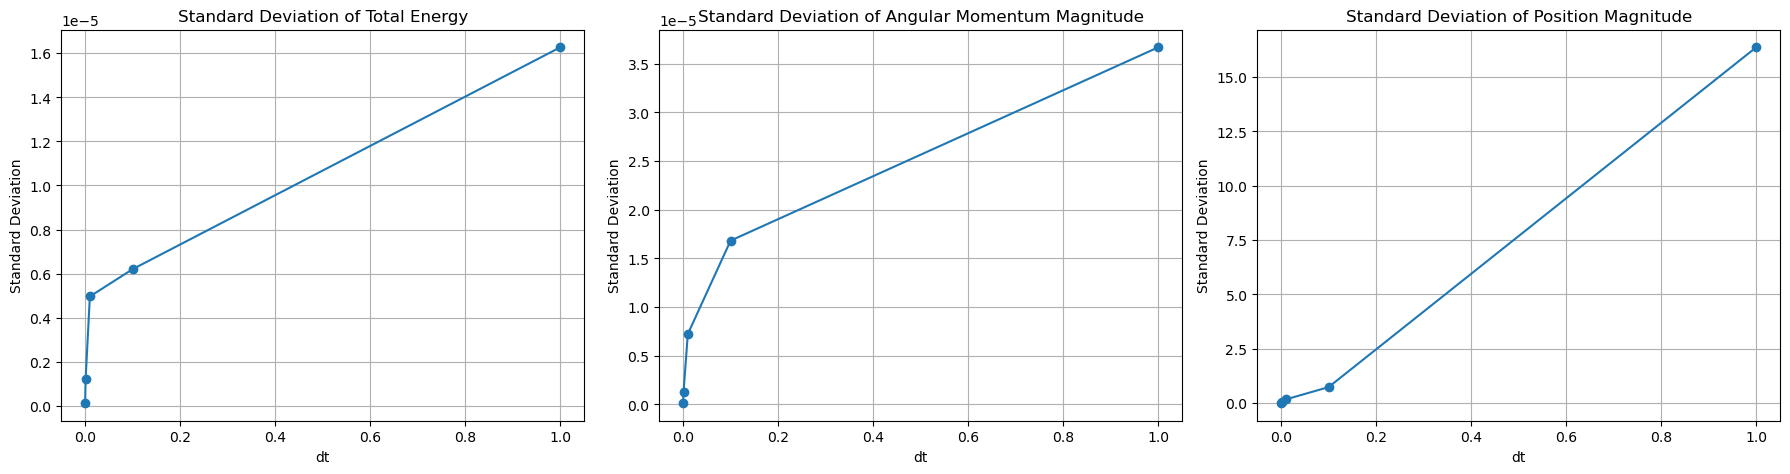

In [9]:
dt_vals = np.array([0.0001, 0.001, 0.01, 0.1, 1])

# Reverse the lists to match dt_vals order
std_total_energy_list_r = std_total_energy_list[::-1]
std_angular_momentum_list_r = std_angular_momentum_list[::-1]
std_position_magnitude_list_r = std_position_magnitude_list[::-1]

# Create a figure with 3 subplots in one row
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Standard deviation of total energy
axs[0].plot(dt_vals, std_total_energy_list_r, marker='o', linestyle='-')
axs[0].set_title("Standard Deviation of Total Energy")
axs[0].set_xlabel("dt")
axs[0].set_ylabel("Standard Deviation")
axs[0].grid(True)

# Plot 2: Standard deviation of angular momentum magnitude
axs[1].plot(dt_vals, std_angular_momentum_list_r, marker='o', linestyle='-')
axs[1].set_title("Standard Deviation of Angular Momentum Magnitude")
axs[1].set_xlabel("dt")
axs[1].set_ylabel("Standard Deviation")
axs[1].grid(True)

# Plot 3: Standard deviation of position magnitude
axs[2].plot(dt_vals, std_position_magnitude_list_r, marker='o', linestyle='-')
axs[2].set_title("Standard Deviation of Position Magnitude")
axs[2].set_xlabel("dt")
axs[2].set_ylabel("Standard Deviation")
axs[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### 2-Body system propagation using Velocity-Verlet method (Similar masses)

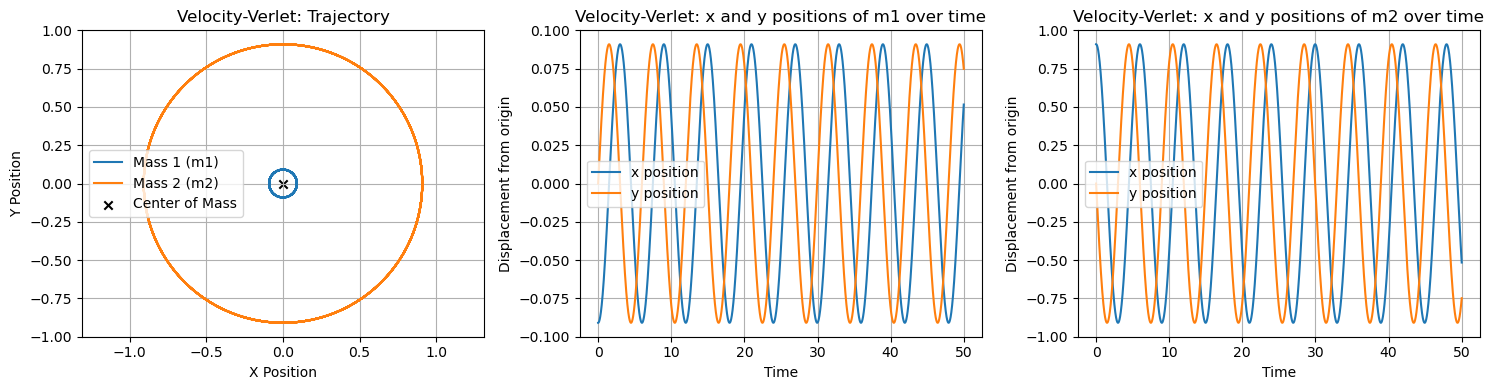

In [10]:
# Constants
m1 = 1  # Mass of larger body
m2 = 0.1  # Mass of smaller body
M = m1 + m2  # Total mass

d = 1  # Initial separation distance
Rcom = np.array([0, 0])  # Center of mass is at the origin

# Initial positions on the x-axis relative to COM
r1 = np.array([-m2/M * d, 0])
r2 = np.array([m1/M * d, 0])

# Corrected velocity calculation for circular orbit
v1 = np.array([0, np.sqrt(G * m2**2 / (d * M))])
v2 = np.array([0, -np.sqrt(G * m1**2 / (d * M))])

# Time setup
dt = 0.001
steps = 50000

# Initialize arrays to store positions, velocities, forces, energies, and angular momentum
positions1 = np.zeros((steps, 2))
positions2 = np.zeros((steps, 2))
velocities1 = np.zeros((steps, 2))
velocities2 = np.zeros((steps, 2))
PE_total = np.zeros(steps)
KE1 = np.zeros(steps)
KE2 = np.zeros(steps)
KE_total = np.zeros(steps)
E_total = np.zeros(steps)
L1 = np.zeros(steps)
L2 = np.zeros(steps)
L_total = np.zeros(steps)

# Initial positions and velocities
positions1[0] = r1
positions2[0] = r2
velocities1[0] = v1
velocities2[0] = v2

# Calculate initial energies and angular momentum
r_rel = r2 - r1
PE_total[0] = -G * m1 * m2 / np.linalg.norm(r_rel)
KE1[0] = 0.5 * m1 * np.linalg.norm(v1)**2
KE2[0] = 0.5 * m2 * np.linalg.norm(v2)**2
KE_total[0] = KE1[0] + KE2[0]
E_total[0] = PE_total[0] + KE_total[0]
L1[0] = np.linalg.norm(np.cross(r1, m1 * v1))
L2[0] = np.linalg.norm(np.cross(r2, m2 * v2))
L_total[0] = L1[0] + L2[0]

# Velocity Verlet Integration without indexing forces arrays
for i in range(0, steps-1):
    # Compute the forces (accelerations) based on positions
    F1 = force(positions1[i], positions2[i], m1, m2)
    F2 = -F1  # Equal and opposite force

    # Compute accelerations
    a1 = F1 / m1
    a2 = F2 / m2
    
    # Update positions using Velocity Verlet
    positions1[i+1] = positions1[i] + velocities1[i] * dt + 0.5 * a1 * dt**2
    positions2[i+1] = positions2[i] + velocities2[i] * dt + 0.5 * a2 * dt**2
    
    # Compute new force based on updated positions
    F1_new = force(positions1[i+1], positions2[i+1], m1, m2)
    F2_new = -F1_new
    
    # Compute new accelerations based on new forces
    a1_new = F1_new / m1
    a2_new = F2_new / m2
    
    # Update velocities using Velocity Verlet
    velocities1[i+1] = velocities1[i] + 0.5 * (a1 + a1_new) * dt
    velocities2[i+1] = velocities2[i] + 0.5 * (a2 + a2_new) * dt
    
    # Calculate potential energy (PE) for the system
    r_rel = positions2[i+1] - positions1[i+1]
    PE_total[i+1] = -G * m1 * m2 / np.linalg.norm(r_rel)
    
    # Kinetic energies of each mass
    KE1[i+1] = 0.5 * m1 * np.linalg.norm(velocities1[i+1])**2
    KE2[i+1] = 0.5 * m2 * np.linalg.norm(velocities2[i+1])**2
    KE_total[i+1] = KE1[i+1] + KE2[i+1]
    
    # Total energy (PE + KE)
    E_total[i+1] = PE_total[i+1] + KE_total[i+1]
    
    # Angular momentum (L) calculation
    L1[i+1] = np.linalg.norm(np.cross(positions1[i+1], m1 * velocities1[i+1]))
    L2[i+1] = np.linalg.norm(np.cross(positions2[i+1], m2 * velocities2[i+1]))
    L_total[i+1] = L1[i+1] + L2[i+1]

fig, ax = plt.subplots( 1, 3, figsize=(15, 4))

# Trajectory plot
ax[0].plot(positions1[:, 0], positions1[:, 1], label='Mass 1 (m1)')
ax[0].plot(positions2[:, 0], positions2[:, 1], label='Mass 2 (m2)')
ax[0].scatter([0], [0], color='black', marker='x', label='Center of Mass')
ax[0].legend()
ax[0].set_xlabel('X Position')
ax[0].set_ylabel('Y Position')
ax[0].set_title('Velocity-Verlet: Trajectory')
ax[0].axis('equal')
ax[0].grid()

# m1 positions over time
ax[1].plot(np.arange(steps) * dt, positions1[:, 0], label='x position')
ax[1].plot(np.arange(steps) * dt, positions1[:, 1], label='y position')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Displacement from origin')
ax[1].set_title('Velocity-Verlet: x and y positions of m1 over time')
ax[1].legend()
ax[1].grid()

# m2 positions over time
ax[2].plot(np.arange(steps) * dt, positions2[:, 0], label='x position')
ax[2].plot(np.arange(steps) * dt, positions2[:, 1], label='y position')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Displacement from origin')
ax[2].set_title('Velocity-Verlet: x and y positions of m2 over time')
ax[2].legend()
ax[2].grid()

plt.tight_layout()
plt.savefig("Velocity-Verlet")
plt.show()


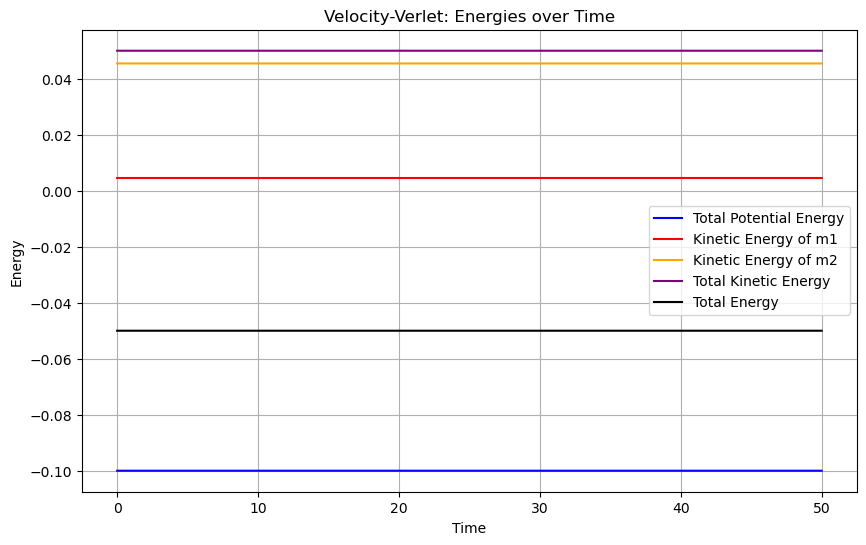

In [11]:
# Plot the individual and total energies (PE and KE)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(steps) * dt, PE_total, label='Total Potential Energy', color='blue')
plt.plot(np.arange(steps) * dt, KE1, label='Kinetic Energy of m1', color='red')
plt.plot(np.arange(steps) * dt, KE2, label='Kinetic Energy of m2', color='orange')
plt.plot(np.arange(steps) * dt, KE_total, label='Total Kinetic Energy', color='purple')
plt.plot(np.arange(steps) * dt, E_total, label='Total Energy', color='black')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Velocity-Verlet: Energies over Time')
plt.legend()
plt.grid()
plt.show()

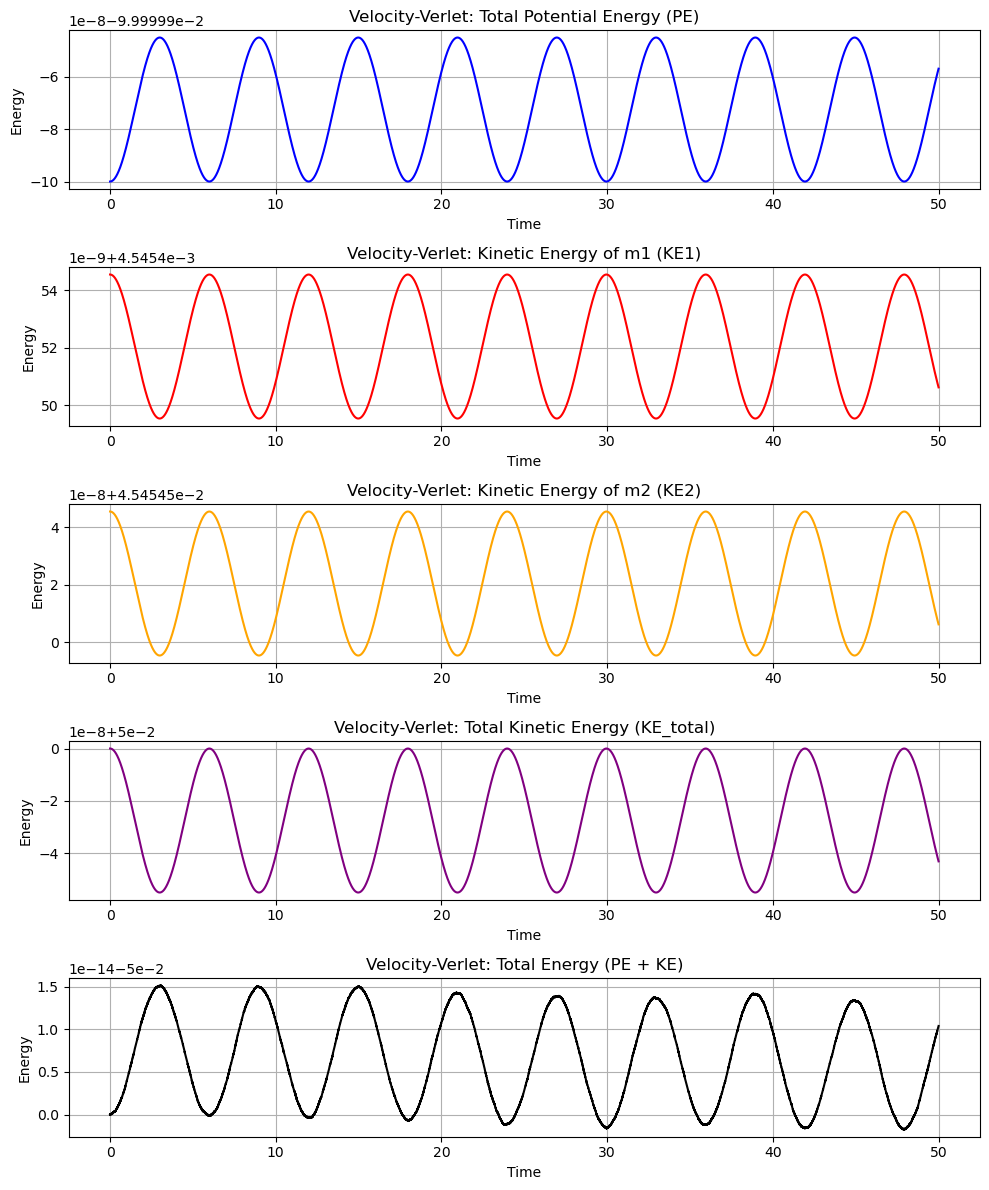

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 12))

axs[0].plot(np.arange(steps) * dt, PE_total, color='blue')
axs[0].set_ylabel("Energy")
axs[0].set_xlabel("Time")
axs[0].set_title("Velocity-Verlet: Total Potential Energy (PE)")
axs[0].grid()

axs[1].plot(np.arange(steps) * dt, KE1, color='red')
axs[1].set_ylabel("Energy")
axs[1].set_xlabel("Time")
axs[1].set_title("Velocity-Verlet: Kinetic Energy of m1 (KE1)")
axs[1].grid()

axs[2].plot(np.arange(steps) * dt, KE2, color='orange')
axs[2].set_ylabel("Energy")
axs[2].set_xlabel("Time")
axs[2].set_title("Velocity-Verlet: Kinetic Energy of m2 (KE2)")
axs[2].grid()

axs[3].plot(np.arange(steps) * dt, KE_total, color='purple')
axs[3].set_xlabel("Time")
axs[3].set_ylabel("Energy")
axs[3].set_title("Velocity-Verlet: Total Kinetic Energy (KE_total)")
axs[3].grid()

axs[4].plot(np.arange(steps) * dt, E_total, color='black')
axs[4].set_xlabel("Time")
axs[4].set_ylabel("Energy")
axs[4].set_title("Velocity-Verlet: Total Energy (PE + KE)")
axs[4].grid()

plt.tight_layout()
plt.savefig("velocity verlet energy")
plt.show()

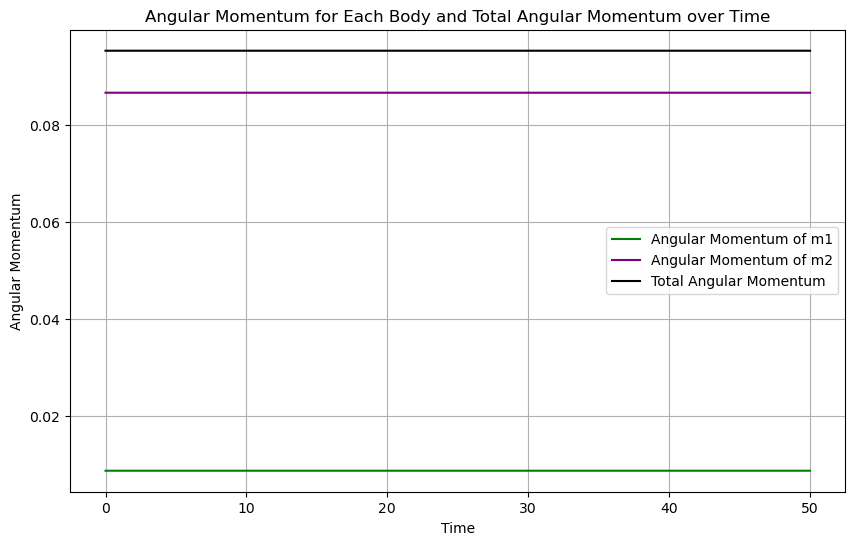

In [13]:
# Plot the angular momenta
plt.figure(figsize=(10, 6))
plt.plot(np.arange(steps) * dt, L1, label='Angular Momentum of m1', color='green')
plt.plot(np.arange(steps) * dt, L2, label='Angular Momentum of m2', color='purple')
plt.plot(np.arange(steps) * dt, L_total, label='Total Angular Momentum', color='black')
plt.xlabel('Time')
plt.ylabel('Angular Momentum')
plt.title('Angular Momentum for Each Body and Total Angular Momentum over Time')
plt.legend()
plt.grid()
plt.show()

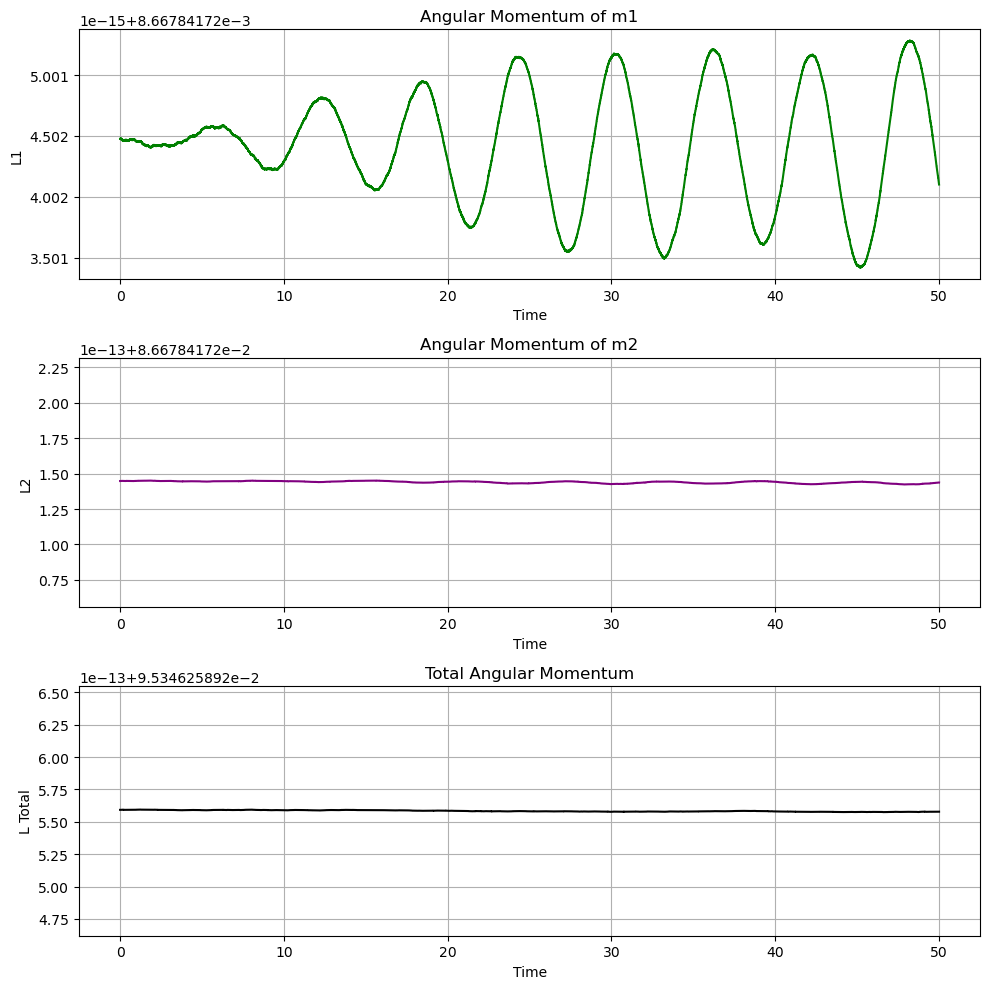

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

axs[0].plot(np.arange(steps) * dt, L1, color='green')
axs[0].set_ylabel("L1")
axs[0].set_xlabel("Time")
axs[0].set_title("Angular Momentum of m1")
axs[0].grid()

axs[1].plot(np.arange(steps) * dt, L2, color='purple')
axs[1].set_ylabel("L2")
axs[1].set_xlabel("Time")
axs[1].set_title("Angular Momentum of m2")
axs[1].grid()

axs[2].plot(np.arange(steps) * dt, L_total, color='black')
axs[2].set_xlabel("Time")
axs[2].set_ylabel("L Total")
axs[2].set_title("Total Angular Momentum")
axs[2].grid()

plt.tight_layout()
plt.savefig(fname='Velocity-Veret ang mom')
plt.show()

In [15]:
def two_body_rhs(y, t, m1, m2, G=1):
    r1, r2 = y[:2], y[2:4]
    v1, v2 = y[4:6], y[6:]
    
    F1 = force(r1, r2, m1, m2)
    F2 = -F1
    
    dr1dt = v1
    dr2dt = v2
    dv1dt = F1 / m1
    dv2dt = F2 / m2
    
    return np.concatenate([dr1dt, dr2dt, dv1dt, dv2dt])

def RK4_solver(fun, y0, dt, N, m1, m2):
    y = np.zeros((N+1, len(y0)))
    y[0] = y0
    t = 0
    for i in range(N):
        k1 = dt * fun(y[i], t, m1, m2, G)
        k2 = dt * fun(y[i] + 0.5 * k1, t + 0.5 * dt, m1, m2, G)
        k3 = dt * fun(y[i] + 0.5 * k2, t + 0.5 * dt, m1, m2, G)
        k4 = dt * fun(y[i] + k3, t + dt, m1, m2, G)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        t += dt
    return y

# Constants
G = 1  # Gravitational constant (normalized)
m1 = 1  # Mass of larger body
m2 = 0.1  # Mass of smaller body
M = m1 + m2  # Total mass
d = 1  # Initial separation distance

# Initial positions and velocities (2D vectors)
r1 = np.array([-m2/M * d, 0])
r2 = np.array([m1/M * d, 0])
v1 = np.array([0, np.sqrt(G * m2**2 / (d * M))])
v2 = np.array([0, -np.sqrt(G * m1**2 / (d * M))])

# Initial conditions as a single vector
y0 = np.concatenate([r1, r2, v1, v2])

# Time setup
dt = 0.001
steps = 50000

# Solve using RK4
solution = RK4_solver(two_body_rhs, y0, dt, steps, m1, m2)

# Extract positions and velocities
positions1 = solution[:, :2]
positions2 = solution[:, 2:4]
velocities1 = solution[:, 4:6]
velocities2 = solution[:, 6:]

# Compute energies and angular momenta
ke1 = 0.5 * m1 * np.sum(velocities1**2, axis=1)
ke2 = 0.5 * m2 * np.sum(velocities2**2, axis=1)
total_ke = ke1 + ke2
pe = -G * m1 * m2 / np.linalg.norm(positions2 - positions1, axis=1)
total_energy = total_ke + pe

# Compute angular momentum using cross product
angular_momentum1 = np.cross(positions1, m1 * velocities1)
angular_momentum2 = np.cross(positions2, m2 * velocities2)
total_angular_momentum = angular_momentum1 + angular_momentum2

# Time array
time = np.arange(0, (steps+1)*dt, dt)

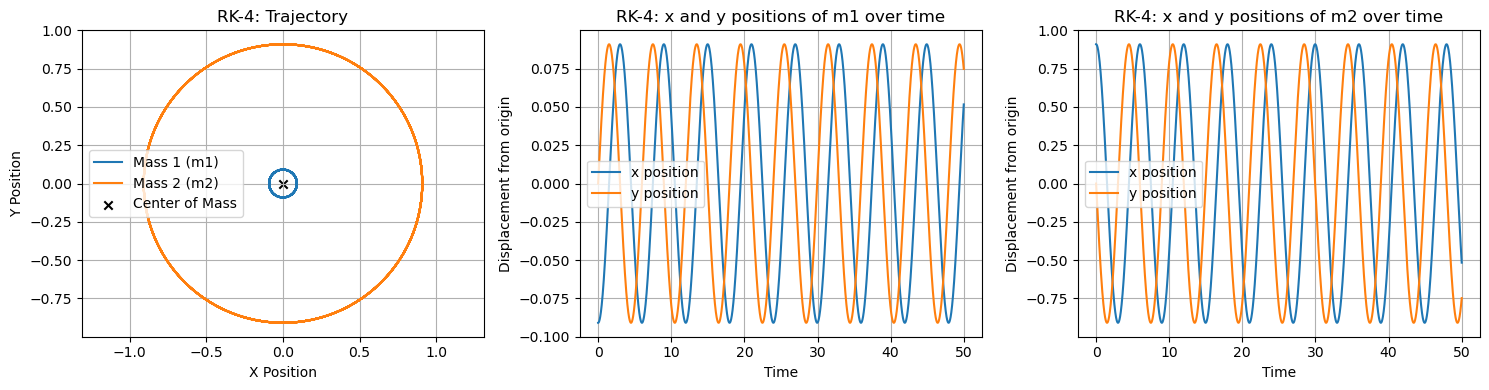

In [16]:
fig, ax = plt.subplots( 1, 3, figsize=(15, 4))

# Trajectory plot
ax[0].plot(positions1[:, 0], positions1[:, 1], label='Mass 1 (m1)')
ax[0].plot(positions2[:, 0], positions2[:, 1], label='Mass 2 (m2)')
ax[0].scatter([0], [0], color='black', marker='x', label='Center of Mass')
ax[0].legend()
ax[0].set_xlabel('X Position')
ax[0].set_ylabel('Y Position')
ax[0].set_title('RK-4: Trajectory')
ax[0].axis('equal')
ax[0].grid()

# m1 positions over time
ax[1].plot(np.arange(steps+1) * dt, positions1[:, 0], label='x position')
ax[1].plot(np.arange(steps+1) * dt, positions1[:, 1], label='y position')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Displacement from origin')
ax[1].set_title('RK-4: x and y positions of m1 over time')
ax[1].legend()
ax[1].grid()

# m2 positions over time
ax[2].plot(np.arange(steps+1) * dt, positions2[:, 0], label='x position')
ax[2].plot(np.arange(steps+1) * dt, positions2[:, 1], label='y position')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Displacement from origin')
ax[2].set_title('RK-4: x and y positions of m2 over time')
ax[2].legend()
ax[2].grid()

plt.tight_layout()
plt.savefig("RK-4")
plt.show()

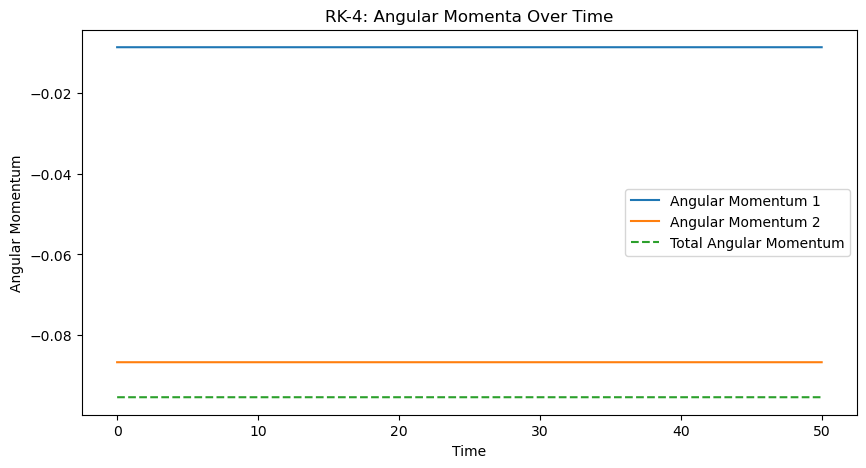

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(time, angular_momentum1, label="Angular Momentum 1")
plt.plot(time, angular_momentum2, label="Angular Momentum 2")
plt.plot(time, total_angular_momentum, label="Total Angular Momentum", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.legend()
plt.title("RK-4: Angular Momenta Over Time")
plt.show()

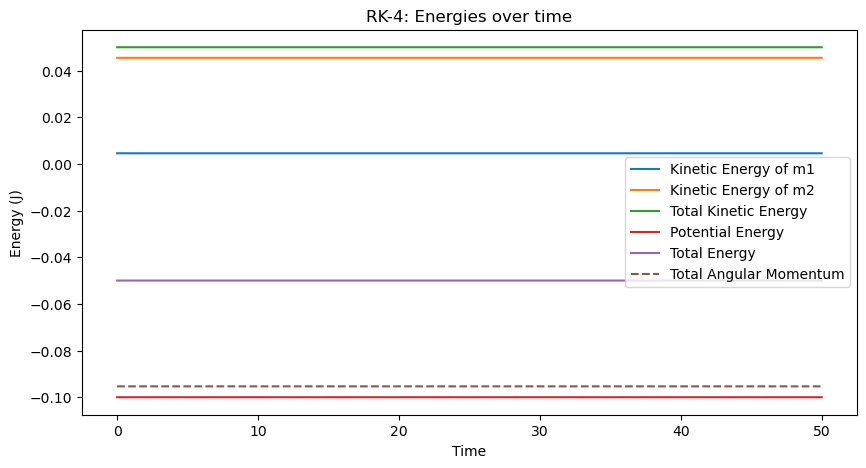

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(time, ke1, label="Kinetic Energy of m1")
plt.plot(time, ke2, label="Kinetic Energy of m2")
plt.plot(time, total_ke, label="Total Kinetic Energy")
plt.plot(time, pe, label="Potential Energy")
plt.plot(time, total_energy, label="Total Energy")
plt.plot(time, total_angular_momentum, label="Total Angular Momentum", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Energy (J)")
plt.legend()
plt.title("RK-4: Energies over time")
plt.show()

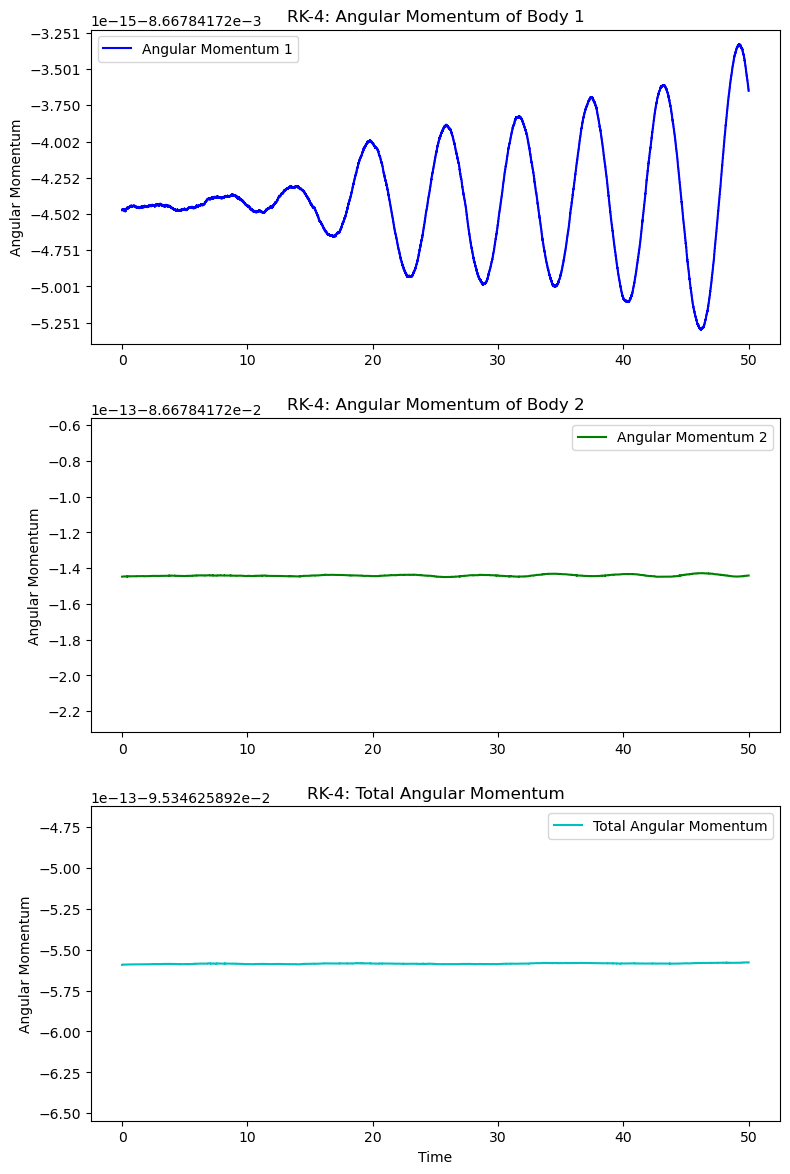

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(time, angular_momentum1, label="Angular Momentum 1", color='b')
axs[0].set_title("RK-4: Angular Momentum of Body 1")
axs[0].set_ylabel("Angular Momentum")
axs[0].legend()

axs[1].plot(time, angular_momentum2, label="Angular Momentum 2", color='g')
axs[1].set_title("RK-4: Angular Momentum of Body 2")
axs[1].set_ylabel("Angular Momentum")
axs[1].legend()

axs[2].plot(time, total_angular_momentum, label="Total Angular Momentum", color='c')
axs[2].set_title("RK-4: Total Angular Momentum")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Angular Momentum")
axs[2].legend()

plt.tight_layout()
plt.savefig(fname='RK-4 ang mom')
plt.show()

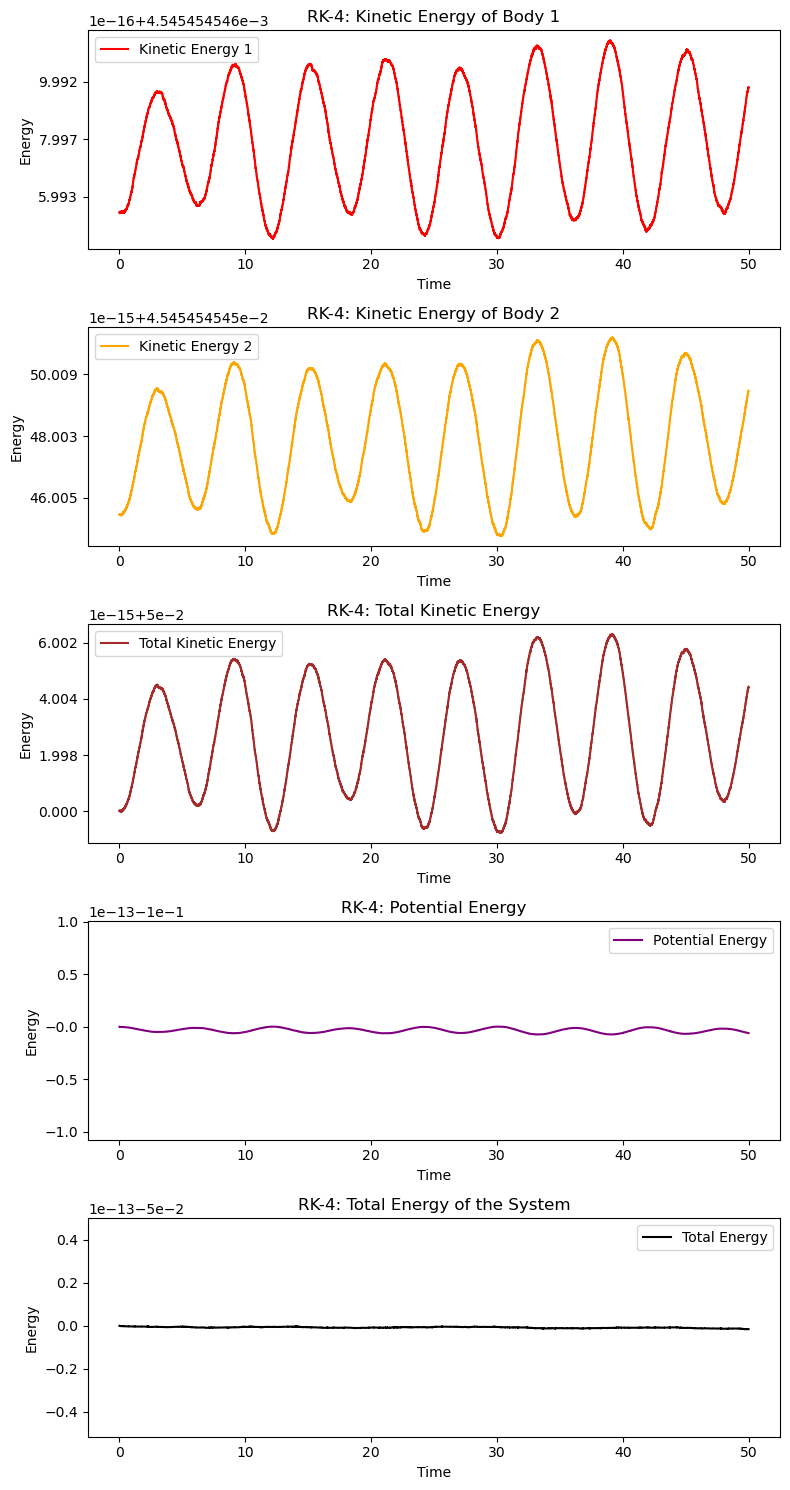

In [20]:
fig, axs = plt.subplots(5, 1, figsize=(8, 15))

axs[0].plot(time, ke1, label="Kinetic Energy 1", color='r')
axs[0].set_title("RK-4: Kinetic Energy of Body 1")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Energy")
axs[0].legend()

axs[1].plot(time, ke2, label="Kinetic Energy 2", color='orange')
axs[1].set_title("RK-4: Kinetic Energy of Body 2")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Energy")
axs[1].legend()

axs[2].plot(time, total_ke, label="Total Kinetic Energy", color='brown')
axs[2].set_title("RK-4: Total Kinetic Energy")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Energy")
axs[2].legend()

axs[3].plot(time, pe, label="Potential Energy", color='purple')
axs[3].set_title("RK-4: Potential Energy")
axs[3].set_xlabel("Time")
axs[3].set_ylabel("Energy")
axs[3].legend()

axs[4].plot(time, total_energy, label="Total Energy", color='k')
axs[4].set_title("RK-4: Total Energy of the System")
axs[4].set_xlabel("Time")
axs[4].set_ylabel("Energy")
axs[4].legend()

plt.tight_layout()
plt.savefig(fname='RK-4 energies')
plt.show()

I had trouble performing the velocity verlet method because I was trying call it as a function, however, after numerically iterating over elements I was able to solve this problem.
The RK-4 method proved challending because it wasnt providing the same results as the velocity verlet did. I rechecked the code and notice I had issues with equating the solver, hence I defined the right hand side function to solve the problem. 